# NBA Player Archetypes

In [20]:
# Loading data into pandas and other plotting libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
nba = pd.read_csv('Downloads\Seasons_Stats.csv\Seasons_Stats.csv')

In [21]:
# Transforming data for analysis

# Drop rows with missing player names
nba = nba.dropna(subset=["Player"])

# Focus on 2000 and later
nba = nba[nba["Year"] >= 2000]

# Keep players with at least 500 minutes
nba = nba[nba["MP"] >= 500]

# Drop irrelevant or mostly empty columns
missing_ratio = nba.isnull().mean()
nba = nba[missing_ratio[missing_ratio < 0.5].index]

# Drop known unused/redundant columns
columns_to_drop = ['Unnamed: 0', 'Tm', 'Pos']  # drop index, team, and position
nba = nba.drop(columns=[col for col in columns_to_drop if col in nba.columns])

# Reset index
nba = nba.reset_index(drop=True)

# View shape and head
print("Cleaned Data Shape:", nba.shape)
nba.head()

Cleaned Data Shape: (6744, 48)


,Year,Player,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2000.0,Tariq Abdul-Wahad,25.0,61.0,56.0,1578.0,13.6,0.477,0.036,0.299,...,0.756,101.0,190.0,291.0,98.0,59.0,28.0,106.0,147.0,697.0
1,2000.0,Tariq Abdul-Wahad,25.0,46.0,46.0,1205.0,14.4,0.484,0.041,0.293,...,0.762,77.0,162.0,239.0,72.0,53.0,16.0,87.0,116.0,563.0
2,2000.0,Shareef Abdur-Rahim,23.0,82.0,82.0,3223.0,20.2,0.547,0.075,0.431,...,0.809,218.0,607.0,825.0,271.0,89.0,87.0,249.0,244.0,1663.0
3,2000.0,Ray Allen,24.0,82.0,82.0,3070.0,20.6,0.570,0.288,0.282,...,0.887,83.0,276.0,359.0,308.0,110.0,19.0,183.0,187.0,1809.0
4,2000.0,John Amaechi,29.0,80.0,53.0,1684.0,13.2,0.505,0.009,0.416,...,0.766,62.0,204.0,266.0,95.0,35.0,37.0,139.0,161.0,836.0


In [22]:
# See summary statistics
print(nba.describe())

              Year          Age            G           GS           MP  \
count  6744.000000  6744.000000  6744.000000  6744.000000  6744.000000   
mean   2008.735617    27.049229    63.353203    33.934164  1600.886418   
std       5.166393     4.226033    16.378316    28.688829   735.630908   
min    2000.000000    19.000000    14.000000     0.000000   500.000000   
25%    2004.000000    24.000000    53.000000     7.000000   946.000000   
50%    2009.000000    27.000000    67.000000    26.000000  1527.500000   
75%    2013.000000    30.000000    78.000000    62.000000  2174.000000   
max    2017.000000    41.000000    85.000000    83.000000  3485.000000   

               PER          TS%         3PAr          FTr         ORB%  ...  \
count  6744.000000  6744.000000  6744.000000  6744.000000  6744.000000  ...   
mean     14.179211     0.527250     0.221548     0.293219     5.439798  ...   
std       4.076962     0.047183     0.194476     0.138919     3.800745  ...   
min       2.00000

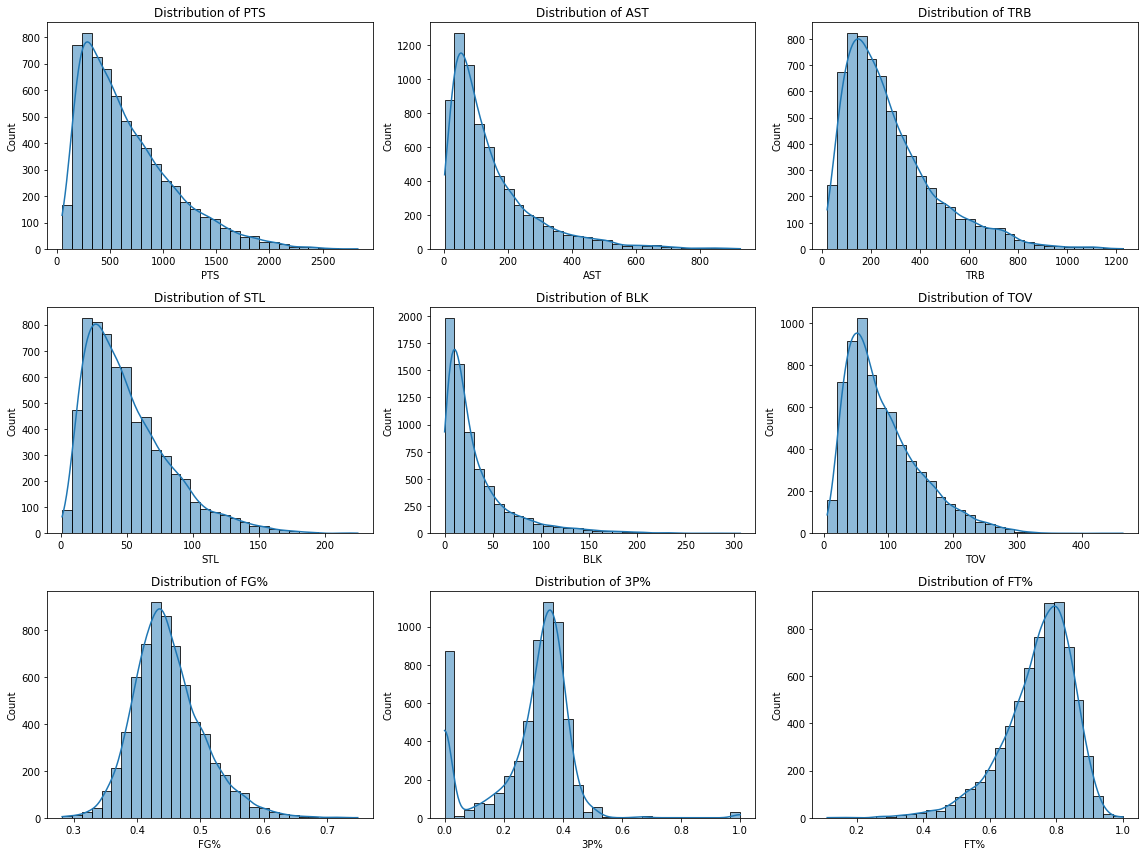

In [23]:
# Plot distributions of key stats
stats_to_plot = ['PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV', 'FG%', '3P%', 'FT%']
nba_subset = nba[stats_to_plot]

plt.figure(figsize=(16, 12))
for i, col in enumerate(stats_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(nba[col].dropna(), bins=30, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

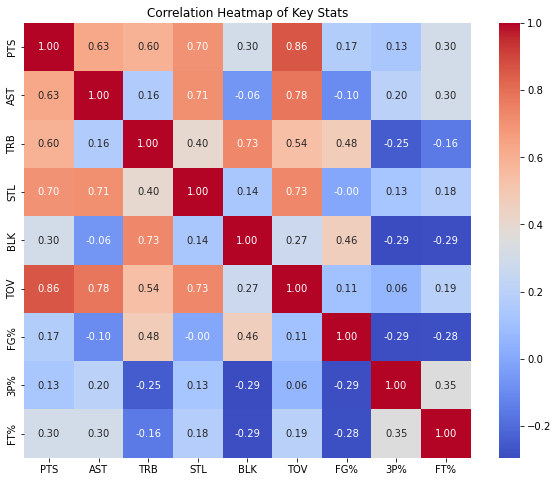

In [24]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = nba_subset.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Key Stats")
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = ['PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV', 'FG%', '3P%', 'FT%', 'PER', 'TS%']

# Drop rows with missing values in our selected features
nba_cluster = nba.dropna(subset=features)[features + ['Player', 'Year']]

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(nba_cluster[features])

nba_cluster.head

<bound method NDFrame.head of          PTS    AST    TRB    STL   BLK    TOV    FG%    3P%    FT%   PER  \
0      697.0   98.0  291.0   59.0  28.0  106.0  0.424  0.130  0.756  13.6   
1      563.0   72.0  239.0   53.0  16.0   87.0  0.433  0.095  0.762  14.4   
2     1663.0  271.0  825.0   89.0  87.0  249.0  0.465  0.302  0.809  20.2   
3     1809.0  308.0  359.0  110.0  19.0  183.0  0.455  0.423  0.887  20.6   
4      836.0   95.0  266.0   35.0  37.0  139.0  0.437  0.167  0.766  13.2   
...      ...    ...    ...    ...   ...    ...    ...    ...    ...   ...   
6739   814.0  122.0  449.0  114.0  30.0   96.0  0.527  0.381  0.523  14.9   
6740   639.0   99.0  405.0   62.0  58.0   65.0  0.571  0.000  0.679  16.7   
6741   178.0   42.0  124.0    7.0  21.0   20.0  0.494  0.000  0.564  13.0   
6742   240.0   36.0  125.0   15.0  16.0   40.0  0.398  0.333  0.775   6.9   
6743   284.0   30.0  159.0   14.0  33.0   30.0  0.529  0.000  0.653  17.0   

        TS%               Player    Year  
0 

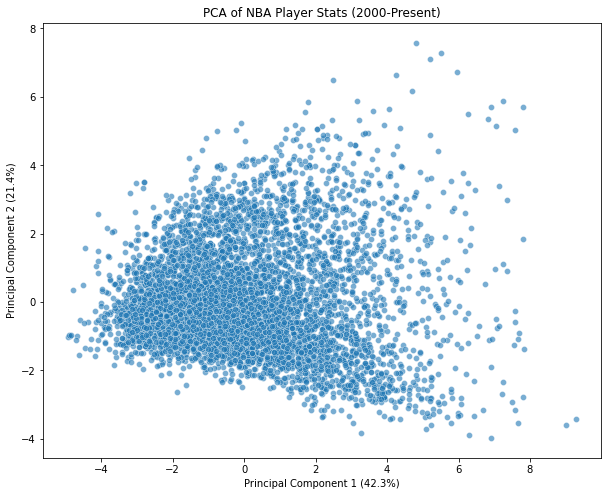

In [26]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df = pd.concat([pca_df, nba_cluster[['Player', 'Year']]], axis=1)

# Plot the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.6)
plt.title('PCA of NBA Player Stats (2000-Present)')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.show()

In [27]:
# Examine component loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=features)
print("PCA Component Loadings:")
print(loadings)

PCA Component Loadings:
          PC1       PC2
PTS  0.419479 -0.134577
AST  0.299670 -0.366096
TRB  0.346374  0.290491
STL  0.341331 -0.222324
BLK  0.241819  0.405135
TOV  0.398536 -0.179061
FG%  0.235344  0.418068
3P%  0.005405 -0.416647
FT%  0.075519 -0.393964
PER  0.393726  0.054584
TS%  0.253588  0.106250


Text(0.5, 1.0, 'Elbow Method')

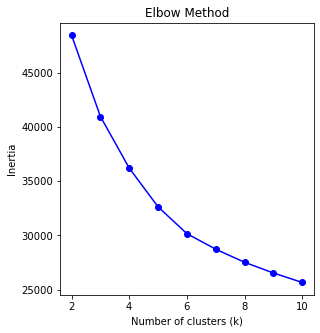

In [28]:
from sklearn.cluster import KMeans

# Calculate inertia for different k values
inertia = [] # Sum of squared differences to nearest cluster
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

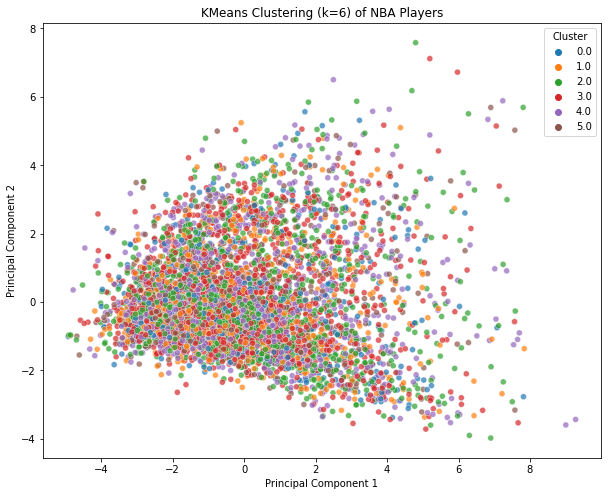

In [29]:
# Fit KMeans with chosen number of clusters
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
nba_cluster['Cluster'] = kmeans.fit_predict(X)

pca_df['Cluster'] = nba_cluster['Cluster']

plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', alpha=0.7)
plt.title(f'KMeans Clustering (k={optimal_k}) of NBA Players')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [30]:
cluster_summary = nba_cluster.groupby('Cluster')[features].mean()
print(cluster_summary)

                 PTS         AST         TRB         STL         BLK  \
Cluster                                                                
0        1462.223404  454.629433  359.191489  109.631206   27.790780   
1         451.058140   60.984496  323.024548   35.649871   43.647287   
2         906.477147  212.532548  299.049861   71.564404   24.643352   
3         455.051417   92.759394  160.214239   34.336849   13.779829   
4         313.682443   90.883206  142.503053   33.088550   13.609924   
5        1153.387947  158.286252  673.177024   67.150659  110.335217   

                TOV       FG%       3P%       FT%        PER       TS%  
Cluster                                                                 
0        210.812057  0.447246  0.343046  0.812395  19.737057  0.546709  
1         67.667959  0.500052  0.055336  0.662574  14.374419  0.535012  
2        121.644044  0.441102  0.350356  0.787038  15.025000  0.536011  
3         56.561635  0.439444  0.374485  0.799944  13.2367

In [31]:
nba_cluster['Cluster'] = kmeans.labels_

# Pick 3 representative players from each cluster
for cluster_num in sorted(nba_cluster['Cluster'].unique()):
    print(f"\nCluster {cluster_num} examples:")
    print(nba_cluster[nba_cluster['Cluster'] == cluster_num][['Player', 'Year']].sample(3, random_state=10))


Cluster 0 examples:
              Player    Year
4330    Derrick Rose  2011.0
2861  Deron Williams  2007.0
5330    LeBron James  2014.0

Cluster 1 examples:
             Player    Year
5106      Ekpe Udoh  2013.0
5269  Joel Freeland  2014.0
5075    Jason Smith  2013.0

Cluster 2 examples:
            Player    Year
4783    J.J. Barea  2013.0
6325  Dion Waiters  2016.0
5870    Luis Scola  2015.0

Cluster 3 examples:
              Player    Year
386   Chris Crawford  2001.0
5596   Jose Calderon  2015.0
3410    Larry Hughes  2009.0

Cluster 4 examples:
                Player    Year
1232        Chris Mihm  2003.0
1669       Kareem Rush  2004.0
6311  Anthony Tolliver  2016.0

Cluster 5 examples:
          Player    Year
1797  Chris Bosh  2005.0
4056  Chris Bosh  2011.0
5076  Josh Smith  2013.0


In [32]:
# Set thresholds
undervalued_players = nba_cluster[
    (nba_cluster['PER'] > 15) & 
    (nba_cluster['TS%'] > 0.55) & 
    (nba_cluster['PTS'] < 500) & 
    (nba_cluster['Cluster'].isin([1, 3, 4]))
]

undervalued_players = undervalued_players[['Player', 'Year', 'Cluster', 'PTS', 'PER', 'TS%']]
undervalued_players.sort_values(by='PER', ascending=False).head(10)

,Player,Year,Cluster,PTS,PER,TS%
5365,Brook Lopez,2014.0,1,352.0,25.4,0.629
6602,JaVale McGee,2017.0,1,472.0,25.2,0.642
5747,Enes Kanter,2015.0,3,485.0,24.9,0.611
4529,Manu Ginobili,2012.0,3,440.0,24.1,0.668
6425,DeMarcus Cousins,2017.0,3,414.0,23.3,0.564
6168,Carl Landry,2016.0,3,351.0,22.4,0.605
5910,Isaiah Thomas,2015.0,3,400.0,22.3,0.579
496,Toni Kukoc,2001.0,3,335.0,21.8,0.590
4757,Brandan Wright,2012.0,1,340.0,21.6,0.632
3075,Carl Landry,2008.0,1,342.0,21.4,0.641


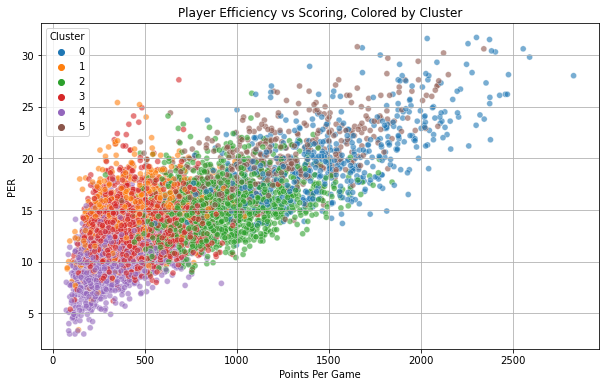

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=nba_cluster, x='PTS', y='PER', hue='Cluster', alpha=0.6, palette='tab10')
plt.title('Player Efficiency vs Scoring, Colored by Cluster')
plt.xlabel('Points Per Game')
plt.ylabel('PER')
plt.grid(True)
plt.show()

This project explored the question: "What types of NBA player archetypes exist based on production?" Using season-level data from 2000 onward, I cleaned and standardized player statistics and focused on key efficiency indicators such as PER and true shooting percentage. I then applied dimensionality reduction with PCA and ran KMeans clustering to uncover six statistically distinct groups of players. These ranged from elite all-around contributors to low-impact role players and efficient big men. The clustering revealed patterns that align with common basketball roles, offering a data-driven way to classify players without relying on predefined positions.

To build on these archetypes, I identified undervalued players. I tried to focus on players with high efficiency but low scoring volume who might be overlooked in traditional evaluations. Examples included Brook Lopez, JaVale McGee, and Manu Ginobili, players who produced exceptional PER and TS% despite relatively modest point totals. This analysis has real-world value for front offices seeking undervalued talent, filling roster gaps, or optimizing salary cap decisions. Ultimately, this project demonstrates how unsupervised machine learning can be used to discover hidden structure in sports performance data and generate actionable insights for strategic decision-making.